# Notebook used to remove duplicate data, balance classes, and create train/validation splits

# Imports

In [1]:
import pandas as pd

# Load file

In [2]:
data = pd.read_csv('/content/train.En.csv')

# Cleanup: remove NaN tweet values and duplicate rows

In [3]:
data

,Unnamed: 0,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
0,0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",0.0,1.0,0.0,0.0,0.0,0.0
1,1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,1.0,0.0,0.0,0.0,0.0,0.0
2,2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",0.0,1.0,0.0,0.0,0.0,0.0
3,3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",1.0,0.0,0.0,0.0,0.0,0.0
4,4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3463,3463,The population spike in Chicago in 9 months is...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3464,3464,You'd think in the second to last English clas...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3465,3465,I’m finally surfacing after a holiday to Scotl...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3466,3466,Couldn't be prouder today. Well done to every ...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
len(data)

3468

In [5]:
# drop rows where the 'tweet' value is NaN
data = data[data['tweet'].notna()]

In [6]:
# 1 row was removed
len(data)

3467

# There is a difference between the 'sarcastic' and 'sarcasm' labels

In [7]:
# display rows where 'sarcastic' is 1 and 'sarcasm' is not 1
data[(data['sarcastic'] == 1) & (data['sarcasm'] != 1)]

,Unnamed: 0,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
0,0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",0.0,1.0,0.0,0.0,0.0,0.0
2,2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",0.0,1.0,0.0,0.0,0.0,0.0
5,5,"@jimrossignol I choose to interpret it as ""XD""...",1,It's a terrible name and the product sounds aw...,0.0,1.0,0.0,1.0,0.0,0.0
6,6,Why would Alexa's recipe for Yorkshire pudding...,1,Great recipe from Alexa,0.0,1.0,0.0,0.0,0.0,1.0
10,10,ANY PENSIONER AND 4 YEAR OLD WHO DARE TAKE ME ...,1,Had a great time playing crazy golf with the f...,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
834,834,The high tomorrow is 45! Anyone wanna go to th...,1,It is finally going to reach 45 degrees outside.,0.0,1.0,0.0,0.0,0.0,1.0
837,837,@majornelson Sounds like a strong contender fo...,1,"This game is terrible, it will definitely not ...",0.0,1.0,0.0,0.0,0.0,0.0
846,846,"oh also, my song with my middle school boyfrie...",1,"Unfortunately, 143 by Bobby Brackens was my so...",0.0,1.0,0.0,0.0,0.0,0.0
847,847,I picked next year's musical already...Electro...,1,"You guys, I just saw the most hysterical fake ...",0.0,1.0,0.0,0.0,0.0,0.0


# There are duplicate tweets with the opposite labels (noise) in the data

In [8]:
# get all duplicate tweets in the dataset
duplicate_data = data[data.duplicated(subset=['tweet'], keep=False)]
duplicate_data

,Unnamed: 0,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
17,17,Whoever’s toddler ass sprayed the entire toile...,1,I hope whoever keeps peeing all over the bathr...,1.0,0.0,0.0,0.0,0.0,0.0
24,24,@AsdaServiceTeam imagine your delivery being 2...,1,It's not acceptable for you to just refund my ...,1.0,0.0,0.0,0.0,0.0,0.0
47,47,@AlexShawESPN @robwishart @GNev2 Does he order...,1,I don’t think he drank 11 beers every hour,1.0,0.0,0.0,0.0,0.0,1.0
338,338,Replace Pelosi #Nancy,1,He should not have been elected president and ...,1.0,0.0,0.0,0.0,0.0,0.0
648,648,if i saw a capybara in person id probably thro...,1,I think capybaras are scary,0.0,1.0,0.0,0.0,1.0,0.0
918,918,Whoever’s toddler ass sprayed the entire toile...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
927,927,@kevinabstract ye,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
928,928,@kevinabstract ye,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,939,@AsdaServiceTeam imagine your delivery being 2...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,940,@AsdaServiceTeam imagine your delivery being 2...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# remove duplicates, retain the first instance; because all positives appear at top of dataframe, all positives will be retained.
data = data.drop_duplicates(subset=['tweet'], keep='first')

# re-check for duplicates, success if none
data[data.duplicated(subset=['tweet'], keep=False)]

,Unnamed: 0,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question


In [10]:
# get positive examples
positive = data[data['sarcastic'] == 1]
len(positive)

867

In [11]:
# sample negative examples equal to the number of positive examples 
negative = data[data['sarcastic'] == 0].sample(n=len(positive), random_state=10)
len(negative)

867

In [12]:
# concatenate positive and negative to get balanced data
balanced_data = pd.concat([positive, negative])

# Create the training and validation splits
Validation set is 1/10 size of training set

In [13]:
half_val_size = len(positive) // 10
print("Target num of validation examples for each class:", half_val_size)

Target num of validation examples for each class: 86


In [14]:
# sample the target number of positive and negative validation examples
val_positive = positive.sample(n=half_val_size, random_state=10)
val_negative = negative.sample(n=half_val_size, random_state=10)

In [15]:
# concantenate positive and negative validation examples
validation = pd.concat([val_positive, val_negative])

In [16]:
# shuffle validation data
validation = validation.sample(frac=1)

In [17]:
# training data are the examples that do not appear in validation set
unused_balanced_data_indices = [index_value for index_value in balanced_data.index if index_value not in validation.index]
training = balanced_data.loc[unused_balanced_data_indices]

In [18]:
# shuffle training data
training = training.sample(frac=1)

In [19]:
len(validation)

172

In [20]:
len(training)

1562

In [21]:
training


,Unnamed: 0,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
341,341,@Dancruz07 Sureeeeeee you do,1,"I could've replied ""You do not despise me, you...",1.0,0.0,0.0,0.0,0.0,0.0
138,138,"@BoardroomBoy Few links for you. To summarise,...",1,"I would omit the ""who'da thunk"" part.",1.0,0.0,0.0,0.0,0.0,1.0
241,241,#bbcqt It sure would be nice if Ms May decided...,1,Theresa May just needs to answer the question.,1.0,0.0,0.0,0.0,0.0,0.0
1359,1359,Someone in Walmart asked my mom if I was a boy...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
588,588,Being a mom with an autoimmune disease means I...,1,I wouldn't because sarcasm is the only weapon ...,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1635,1635,i was so bored today that i let my computer re...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2306,2306,It is midnight. On a Thursday. My roommates de...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3149,3149,"when i was taken off anesthesia today, i told ...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1153,1153,@savingfilm @_celia_bedelia_ I have zero tampo...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
validation

,Unnamed: 0,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
2708,2708,The meaning behind Little Talks - @monstersand...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3416,3416,Kyle is out of town so i made a baked ziti and...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3254,3254,Applying for jobs is so weird and feels fake,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293,293,@lora__ SHOCKED. How am I supposed to tell the...,1,These people were aware of the risks when they...,1.0,0.0,0.0,0.0,0.0,0.0
1,1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
656,656,Is spunk a slur?,1,I am worried that I may have used a slur by sa...,0.0,1.0,0.0,0.0,0.0,1.0
1653,1653,OH MY GOD I AM IN LOVE WITH MY FIANCÉ. https:/...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3074,3074,Just get yer jab and shut yer moof,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,43,"I suppose though, we did sign one for the futu...",1,I wish we could have signed a player for the f...,1.0,0.0,0.0,1.0,0.0,0.0


In [23]:
# check for overlap between train and validation 
result = pd.concat([training, validation]).drop_duplicates(subset=['tweet'], keep=False)
print('Length of concatenated train and validation:', len(result))
print('Length of balanced data:', len(balanced_data))

Length of concatenated train and validation: 1734
Length of balanced data: 1734


# Check tweet length distribution in training and validation splits


Length of training tweets):


count    1562.000000
mean      103.020487
std        61.391213
min         9.000000
25%        58.000000
50%        90.000000
75%       132.000000
max       397.000000
dtype: float64

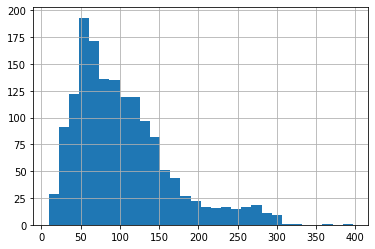

In [24]:
lengths = []

for index, row in training.iterrows():
  current_length = len(row['tweet'])
  lengths.append(current_length)

print("\nLength of training tweets):")
pd.Series(lengths).hist(bins = 30)
pd.Series(lengths).describe()


Length of validation tweets):


count    172.000000
mean      98.139535
std       59.029314
min       13.000000
25%       53.000000
50%       90.000000
75%      129.250000
max      299.000000
dtype: float64

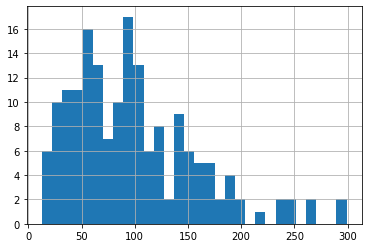

In [25]:
lengths = []

for index, row in validation.iterrows():
  current_length = len(row['tweet'])
  lengths.append(current_length)
  
print("\nLength of validation tweets):")
pd.Series(lengths).hist(bins = 30)
pd.Series(lengths).describe()

# Write results to CSV files

In [26]:
training.to_csv('balanced_train_En.csv')
validation.to_csv('balanced_validation_En.csv')